# Importando as bibliotecas

In [1]:
import talib
from talib import RSI, BBANDS, MACD, ATR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
#from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl import config_tickers
#from finrl.config import INDICATORS

#import itertools

In [5]:
sns.set_style('darkgrid')

# Importando os dados

arquivo salvo como df_completo.to_hdf(diretorio,'dados_fundamentalistas.csv')

In [6]:
diretorio = 'C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/dados_ibovespa.h5'

In [7]:
prices = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/dados_fundamentalistas_final.csv').iloc[:,1:]
#Documents/Aprendizado_reforco_trading/Finrl/Fundamentalistas_investsite/dados_fundamentalistas_final.csv

In [8]:
df_setor = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/Fundamentalistas_investsite/df_setor.csv').iloc[:,1:]

In [9]:
df_setor.segmento_listagem.value_counts()

segmento_listagem
Novo Mercado                         45
Nível 1 de Governança Corporativa    12
Nível 2 de Governança Corporativa    10
Tradicional - BOVESPA                 4
Name: count, dtype: int64

In [10]:
df_setor.setor.value_counts()

setor
Financeiro                         14
Consumo Cíclico                    10
Consumo não Cíclico                 9
Materiais Básicos                   9
Utilidade Pública                   9
Bens Industriais                    7
Petróleo. Gás e Biocombustíveis     5
Saúde                               5
Comunicações                        2
Tecnologia da Informação            1
Name: count, dtype: int64

In [11]:
prices.set_index(['tic','data'],inplace=True)

In [12]:
prices.index.get_level_values('tic').unique()

Index(['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3',
       'BPAC11', 'BRAP4', 'BRFS3', 'BRKM5', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3',
       'CPFE3', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3',
       'ELET3', 'ELET6', 'EMBR3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4',
       'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3',
       'KLBN11', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3',
       'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3',
       'SANB11', 'SBSP3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3',
       'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'WEGE3', 'WIZC3', 'YDUQ3'],
      dtype='object', name='tic')

In [13]:
prices.head()

open       high       low      close     volume  day  \
tic   data                                                                    
ABEV3 2000-02-29  16.980267  17.050261  16.76829  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.76829  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.76829  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.76829  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.76829  11.399803  1126114.0  2.0   

                  receita_liquida  resultado_bruto  ebit  \
tic   data                                                 
ABEV3 2000-02-29              0.0              0.0   0.0   
      2000-03-01              0.0              0.0   0.0   
      2000-03-02              0.0              0.0   0.0   
      2000-03-03              0.0              0.0   0.0   
      2000-03-04              0.0              0.0   0.0   

                  depreciacao_amortizacao  ...  passivo_patrimonio_liquido  \
tic   data                                 ...                               
ABEV3 2000-02-29                      0.0  ...                        0.38   
      2000-03-01                      0.0  ...                        0.38   
      2000-03-02                      0.0  ...                        0.38   
      2000-03-03                      0.0  ...                        0.38   
      2000-03-04                      0.0  ...                        0.38   

                  market_cap_empresa_categoria  pe_diario  \
tic   data                                                  
ABEV3 2000-02-29                           4.0        inf   
      2000-03-01                           4.0        inf   
      2000-03-02                           4.0        inf   
      2000-03-03                           4.0        inf   
      2000-03-04                           4.0        inf   

                  preco_resultado_bruto  preco_ebit_diario  \
tic   data                                                   
ABEV3 2000-02-29                    inf                inf   
      2000-03-01                    inf                inf   
      2000-03-02                    inf                inf   
      2000-03-03                    inf                inf   
      2000-03-04                    inf                inf   

                  preco_ativo_total_diario  preco_divida_bruta_diaria  \
tic   data                                                              
ABEV3 2000-02-29                  2.103145                        inf   
      2000-03-01                  2.103145                        inf   
      2000-03-02                  2.103145                        inf   
      2000-03-03                  2.103145                        inf   
      2000-03-04                  2.103145                        inf   

                  preco_divida_liquida_diaria  preco_valor_patrimonial_diaria  \
tic   data                                                                      
ABEV3 2000-02-29                   -58.954451                        2.908113   
      2000-03-01                   -58.954451                        2.908113   
      2000-03-02                   -58.954451                        2.908113   
      2000-03-03                   -58.954451                        2.908113   
      2000-03-04                   -58.954451                        2.908113   

                  porcentagem_acoes_ordinarias  
tic   data                                      
ABEV3 2000-02-29                           1.0  
      2000-03-01                           1.0  
      2000-03-02                           1.0  
      2000-03-03                           1.0  
      2000-03-04                           1.0  

[5 rows x 60 columns]

# Tratando os dados

**Sustituindo os valores zeros pela media**

In [14]:
prices.replace([np.inf, -np.inf], np.nan, inplace=True)
prices.replace(0, np.nan, inplace=True)

In [15]:
prices = prices.fillna(prices.groupby('tic').median())

# Criando caracteristicas

## Combinando setor e tipo de mercado

In [16]:
df_setor.setor = pd.factorize(df_setor.setor)[0].astype(int)

In [17]:
df_setor.segmento_listagem = pd.factorize(df_setor.segmento_listagem)[0].astype(int)

In [18]:
#df_setor.set_index('tic',inplace=True)

In [19]:
df_selecionado = df_setor[df_setor.tic.isin(prices.index.get_level_values('tic'))]

In [20]:
df_selecionado.shape


(71, 3)

In [21]:
prices = pd.merge(prices.reset_index(), df_selecionado, on='tic').set_index(['tic','data'])

**Tirando index duplicados**

In [22]:
prices = prices[~prices.index.duplicated()]

In [23]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...     pe_diario  \
tic   data                                 ...                 
ABEV3 2000-02-29                  -9.8285  ...   8050.050735   
      2000-03-01                  -9.8285  ...   8050.050735   
      2000-03-02                  -9.8285  ...   8050.050735   
      2000-03-03                  -9.8285  ...   8050.050735   
      2000-03-04                  -9.8285  ...   8050.050735   
...                                   ...  ...           ...   
YDUQ3 2023-09-25                  -2.0217  ...  19040.000916   
      2023-09-26                  -2.0217  ...  19000.000000   
      2023-09-27                  -2.0217  ...  18870.000839   
      2023-09-28                  -2.0217  ...  19600.000381   
      2023-09-29                  -2.0217  ...  19870.000839   

                  preco_resultado_bruto  preco_ebit_diario  \
tic   data                                                   
ABEV3 2000-02-29               0.296507           0.562516   
      2000-03-01               0.296507           0.562516   
      2000-03-02               0.296507           0.562516   
      2000-03-03               0.296507           0.562516   
      2000-03-04               0.296507           0.562516   
...                                 ...                ...   
YDUQ3 2023-09-25               0.077678           0.276280   
      2023-09-26               0.077515           0.275699   
      2023-09-27               0.076984           0.273813   
      2023-09-28               0.079963           0.284406   
      2023-09-29               0.081064           0.288323   

                  preco_ativo_total_diario  preco_divida_bruta_diaria  \
tic   data                                                              
ABEV3 2000-02-29                  2.103145                  61.546739   
      2000-03-01                  2.103145                  61.546739   
      2000-03-02                  2.103145                  61.546739   
      2000-03-03                  2.103145                  61.546739   
      2000-03-04                  2.103145                  61.546739   
...        

## Classifique os ativos por volume médio móvel

**Compute volume**

In [24]:
vol_medio = prices[['close', 'volume']].prod(1).div(1e3)

**Media movel de 21 dias**

In [25]:
vol_medio_21 = (vol_medio
                 .unstack('tic')
                 .rolling(window=21, min_periods=1) # 1 trading month
                 .mean())

**Classifique as acoes pela media movel**

In [26]:
prices['rank_volume_medio'] = (vol_medio_21.rank(axis=1, ascending=False).stack('tic').swaplevel())

## Calcule o Índice de Força Relativa 

In [27]:
prices['rsi'] = prices.groupby(level='tic').close.apply(RSI).droplevel(level=1, axis=0)

C:\Users\jefer\AppData\Local\Temp\ipykernel_17084\4267500329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(prices.rsi.dropna())


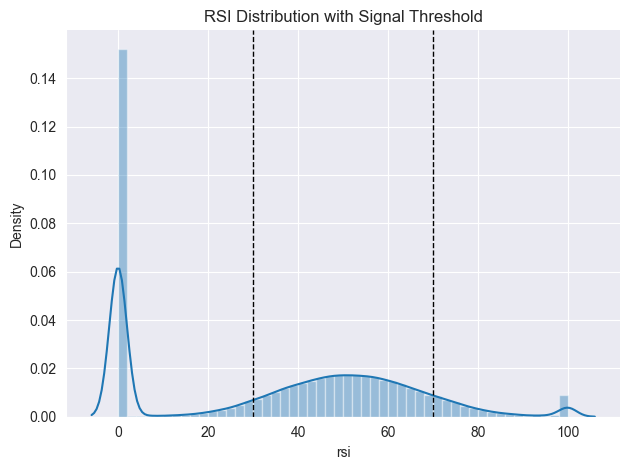

In [28]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
sns.despine()
plt.tight_layout();

## Calcular Bandas de Bollinger 

In [29]:
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)

In [30]:
prices = (prices.join(prices.groupby(level='tic').close.apply(compute_bb).droplevel(level=1, axis=0)))

In [31]:
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)

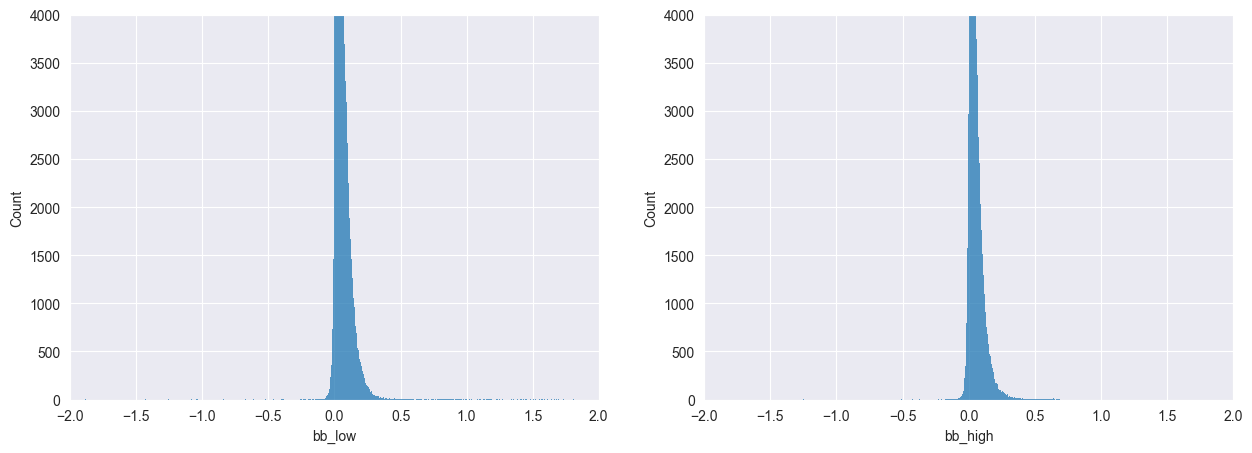

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(prices.loc[:, 'bb_low'].dropna(), ax=axes[0])
axes[0].set_ylim(0, 4000)
axes[0].set_xlim(-2, 2)
sns.histplot(prices.loc[:, 'bb_high'].dropna(), ax=axes[1])
axes[1].set_ylim(0, 4000)
axes[1].set_xlim(-2, 2)
plt.show()

## Computando Average True Range

In [33]:
prices['NATR'] = prices.groupby(level='tic', 
                                group_keys=False).apply(lambda x: 
                                                        talib.NATR(x.high, x.low, x.close))

In [34]:
def compute_atr(stock_data):
    df = ATR(stock_data.high, stock_data.low, 
             stock_data.close, timeperiod=14)
    return df.sub(df.mean()).div(df.std())

In [35]:
prices['ATR'] = (prices.groupby('tic', group_keys=False)
                 .apply(compute_atr))

## Computando o MCAD

In [36]:
prices['PPO'] = prices.groupby(level='tic').close.apply(talib.PPO).droplevel(level=1, axis=0)

In [37]:
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)

In [38]:
prices['MACD'] = (prices
                  .groupby('tic', group_keys=False)
                  .close
                  .apply(compute_macd))

## Computando retornos

In [39]:
percentiles = [.001, .01, .02, .03, .04, .05]
percentiles += [1-p for p in percentiles[::-1]]
T = [1, 5, 10, 21, 42, 63]

### Retornos historicos

In [40]:
by_sym = prices.groupby(level='tic').close
for t in T:
    prices[f'r{t:02}'] = by_sym.pct_change(t)

In [41]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...      NATR       ATR       PPO  \
tic   data                                 ...                                 
ABEV3 2000-02-29                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-01                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-02                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-03                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-04                  -9.8285  ...       NaN       NaN       NaN   
...                                   ...  ...       ...       ...       ...   
YDUQ3 2023-09-25                  -2.0217  ...  5.210161 -0.509576 -1.876841   
      2023-09-26                  -2.0217  ...  5.092553 -0.522575 -2.401406   
      2023-09-27                  -2.0217  ...  5.109624 -0.524384 -2.554140   
      2023-09-28                  -2.0217  ...  4.932369 -0.523023 -2.542115   
      2023-09-29                  -2.0217  ...  4.773052 -0.532781 -2.468546   

                      MACD       r01       r05       r10       r21       r42  \
tic   data                                                                     
ABEV3 2000-02-29       NaN       NaN       NaN       NaN       NaN       NaN   
      2000-03-01       NaN  0.000000       NaN       NaN       NaN       NaN   
      2000-03-02       NaN  0.000000       NaN       NaN       NaN       NaN   
      2000-03-03       NaN  0.000000       NaN       NaN       NaN       NaN   
      2000-03-04       NaN  0.000000       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
YDUQ3 2023-09-25 -0.941093 -0.013982 -0.056492 -0.059753 -0.074380 -0.061078   
      2023-09-26 -1.008372 -0.002101 -0.032094 -0.061728 -0.043785 -0.101562   
      2023-09-27 -1.070837 -0.006842 -0.022786 -0.068148 -0.071815 -0.150935   
      2023-09-28 -0.990148  0.038686  0.015018 -0.075908 -0.035908 -0.108180   
      2023-09-29 -0.872394  0.013776  0.029001 -0.022627 -0.046545 -0.103949   

                       r63  
tic   data                  
ABEV3 2000-02-29      

### Decis de retorno histórico diário 

In [42]:
for t in T:
    prices[f'r{t:02}dec'] = (prices[f'r{t:02}'].dropna(axis=0)
                             .groupby(level='data')
                             .apply(lambda x: pd.qcut(x, 
                                                      q=10, 
                                                      labels=False, 
                                                      duplicates='drop'))
                            .droplevel(level=2, axis=0)
                            .unstack(level="data").stack('data'))

In [43]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...       r10       r21       r42  \
tic   data                                 ...                                 
ABEV3 2000-02-29                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-01                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-02                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-03                  -9.8285  ...       NaN       NaN       NaN   
      2000-03-04                  -9.8285  ...       NaN       NaN       NaN   
...                                   ...  ...       ...       ...       ...   
YDUQ3 2023-09-25                  -2.0217  ... -0.059753 -0.074380 -0.061078   
      2023-09-26                  -2.0217  ... -0.061728 -0.043785 -0.101562   
      2023-09-27                  -2.0217  ... -0.068148 -0.071815 -0.150935   
      2023-09-28                  -2.0217  ... -0.075908 -0.035908 -0.108180   
      2023-09-29                  -2.0217  ... -0.022627 -0.046545 -0.103949   

                       r63  r01dec  r05dec  r10dec  r21dec  r42dec  r63dec  
tic   data                                                                  
ABEV3 2000-02-29       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
      2000-03-01       NaN     0.0     NaN     NaN     NaN     NaN     NaN  
      2000-03-02       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
      2000-03-03       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
      2000-03-04       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...                    ...     ...     ...     ...     ...     ...     ...  
YDUQ3 2023-09-25 -0.090323     1.0     1.0     1.0     2.0     4.0     4.0  
      2023-09-26 -0.081396     7.0     2.0     3.0     4.0     3.0     5.0  
      2023-09-27 -0.081541     4.0     4.0     2.0     2.0     1.0     5.0  
      2023-09-28 -0.034404     9.0     7.0     1.0     3.0     2.0     6.0  
      2023-09-29 -0.066527     7.0     8.0     4.0     2.0     2.0     4.0  

[602980 rows x 82 columns]

### Decis diários de retorno do setor

In [44]:
for t in T:
    prices[f'r{t:02}q_setor'] = (prices.dropna(axis=0)
                                  .groupby(['data', 'setor'])[f'r{t:02}']
                                  .transform(lambda x: pd.qcut(x, 
                                                               q=5, 
                                                               labels=False, 
                                                               duplicates='drop')))

## Computando datas

In [45]:
prices['month'] = pd.to_datetime(prices.index.get_level_values('data')).month
prices['weekday'] = pd.to_datetime(prices.index.get_level_values('data')).weekday

In [46]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...  r42dec  r63dec  r01q_setor  \
tic   data                                 ...                               
ABEV3 2000-02-29                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-01                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-02                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-03                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-04                  -9.8285  ...     NaN     NaN         NaN   
...                                   ...  ...     ...     ...         ...   
YDUQ3 2023-09-25                  -2.0217  ...     4.0     4.0         1.0   
      2023-09-26                  -2.0217  ...     3.0     5.0         4.0   
      2023-09-27                  -2.0217  ...     1.0     5.0         2.0   
      2023-09-28                  -2.0217  ...     2.0     6.0         3.0   
      2023-09-29                  -2.0217  ...     2.0     4.0         3.0   

                  r05q_setor  r10q_setor  r21q_setor  r42q_setor  r63q_setor  \
tic   data                                                                     
ABEV3 2000-02-29         NaN         NaN         NaN         NaN         NaN   
      2000-03-01         NaN         NaN         NaN         NaN         NaN   
      2000-03-02         NaN         NaN         NaN         NaN         NaN   
      2000-03-03         NaN         NaN         NaN         NaN         NaN   
      2000-03-04         NaN         NaN         NaN         NaN         NaN   
...                      ...         ...         ...         ...         ...   
YDUQ3 2023-09-25         3.0         2.0         4.0         4.0         4.0   
      2023-09-26         3.0         3.0         4.0         4.0         4.0   
      2023-09-27         4.0         3.0         3.0         3.0         4.0   
      2023-09-28         4.0         3.0         4.0         3.0         4.0   
      2023-09-29         4.0         3.0         3.0         3.0         4.0   

                  month  weekday  
tic   data                        
ABEV3 2000-02-29      2        1  
 

## Removendo outliers

In [47]:
prices[[f'r{t:02}' for t in T]].describe()

,r01,r05,r10,r21,r42,r63
count,602910.000000,602630.000000,602280.000000,601510.000000,600040.000000,598570.000000
mean,0.158317,0.791644,1.672593,3.661851,7.455466,11.253139
std,120.841853,270.271972,405.062546,612.013991,881.967227,1087.712268
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-0.009804,-0.013388,-0.018458,-0.024579,-0.029214
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.012774,0.020270,0.033793,0.054789,0.073033
max,93827.074074,93827.074074,107231.083333,107231.083333,107231.083333,107231.083333


**Removendo retornos que tem mais de 100% em um dia**

In [48]:
outliers = prices[prices.r01 > 1].index.get_level_values('tic').unique()

In [49]:
prices = prices.drop(outliers, level='tic')

In [50]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...  r42dec  r63dec  r01q_setor  \
tic   data                                 ...                               
ABEV3 2000-02-29                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-01                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-02                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-03                  -9.8285  ...     NaN     NaN         NaN   
      2000-03-04                  -9.8285  ...     NaN     NaN         NaN   
...                                   ...  ...     ...     ...         ...   
YDUQ3 2023-09-25                  -2.0217  ...     4.0     4.0         1.0   
      2023-09-26                  -2.0217  ...     3.0     5.0         4.0   
      2023-09-27                  -2.0217  ...     1.0     5.0         2.0   
      2023-09-28                  -2.0217  ...     2.0     6.0         3.0   
      2023-09-29                  -2.0217  ...     2.0     4.0         3.0   

                  r05q_setor  r10q_setor  r21q_setor  r42q_setor  r63q_setor  \
tic   data                                                                     
ABEV3 2000-02-29         NaN         NaN         NaN         NaN         NaN   
      2000-03-01         NaN         NaN         NaN         NaN         NaN   
      2000-03-02         NaN         NaN         NaN         NaN         NaN   
      2000-03-03         NaN         NaN         NaN         NaN         NaN   
      2000-03-04         NaN         NaN         NaN         NaN         NaN   
...                      ...         ...         ...         ...         ...   
YDUQ3 2023-09-25         3.0         2.0         4.0         4.0         4.0   
      2023-09-26         3.0         3.0         4.0         4.0         4.0   
      2023-09-27         4.0         3.0         3.0         3.0         4.0   
      2023-09-28         4.0         3.0         4.0         3.0         4.0   
      2023-09-29         4.0         3.0         3.0         3.0         4.0   

                  month  weekday  
tic   data                        
ABEV3 2000-02-29      2        1  
 

## Removendo valores faltantes

In [51]:
prices = prices.fillna(prices.groupby('tic').median()).dropna()

In [52]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto     ebit  \
tic   data                                                    
ABEV3 2000-02-29          11960.0          7180.00  3760.00   
      2000-03-01          11960.0          7180.00  3760.00   
      2000-03-02          11960.0          7180.00  3760.00   
      2000-03-03          11960.0          7180.00  3760.00   
      2000-03-04          11960.0          7180.00  3760.00   
...                           ...              ...      ...   
YDUQ3 2023-09-25           1310.0           757.62   213.01   
      2023-09-26           1310.0           757.62   213.01   
      2023-09-27           1310.0           757.62   213.01   
      2023-09-28           1310.0           757.62   213.01   
      2023-09-29           1310.0           757.62   213.01   

                  depreciacao_amortizacao  ...  r42dec  r63dec  r01q_setor  \
tic   data                                 ...                               
ABEV3 2000-02-29                  -9.8285  ...     2.0     2.0         1.0   
      2000-03-01                  -9.8285  ...     2.0     2.0         1.0   
      2000-03-02                  -9.8285  ...     2.0     2.0         1.0   
      2000-03-03                  -9.8285  ...     2.0     2.0         1.0   
      2000-03-04                  -9.8285  ...     2.0     2.0         1.0   
...                                   ...  ...     ...     ...         ...   
YDUQ3 2023-09-25                  -2.0217  ...     4.0     4.0         1.0   
      2023-09-26                  -2.0217  ...     3.0     5.0         4.0   
      2023-09-27                  -2.0217  ...     1.0     5.0         2.0   
      2023-09-28                  -2.0217  ...     2.0     6.0         3.0   
      2023-09-29                  -2.0217  ...     2.0     4.0         3.0   

                  r05q_setor  r10q_setor  r21q_setor  r42q_setor  r63q_setor  \
tic   data                                                                     
ABEV3 2000-02-29         1.0         1.0         1.0         1.0         1.0   
      2000-03-01         1.0         1.0         1.0         1.0         1.0   
      2000-03-02         1.0         1.0         1.0         1.0         1.0   
      2000-03-03         1.0         1.0         1.0         1.0         1.0   
      2000-03-04         1.0         1.0         1.0         1.0         1.0   
...                      ...         ...         ...         ...         ...   
YDUQ3 2023-09-25         3.0         2.0         4.0         4.0         4.0   
      2023-09-26         3.0         3.0         4.0         4.0         4.0   
      2023-09-27         4.0         3.0         3.0         3.0         4.0   
      2023-09-28         4.0         3.0         4.0         3.0         4.0   
      2023-09-29         4.0         3.0         3.0         3.0         4.0   

                  month  weekday  
tic   data                        
ABEV3 2000-02-29      2        1  
 

In [51]:
prices.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
             ..
r21q_setor    0
r42q_setor    0
r63q_setor    0
month         0
weekday       0
Length: 90, dtype: int64

# Visualizando caracteristicas

## Matriz de correlacao

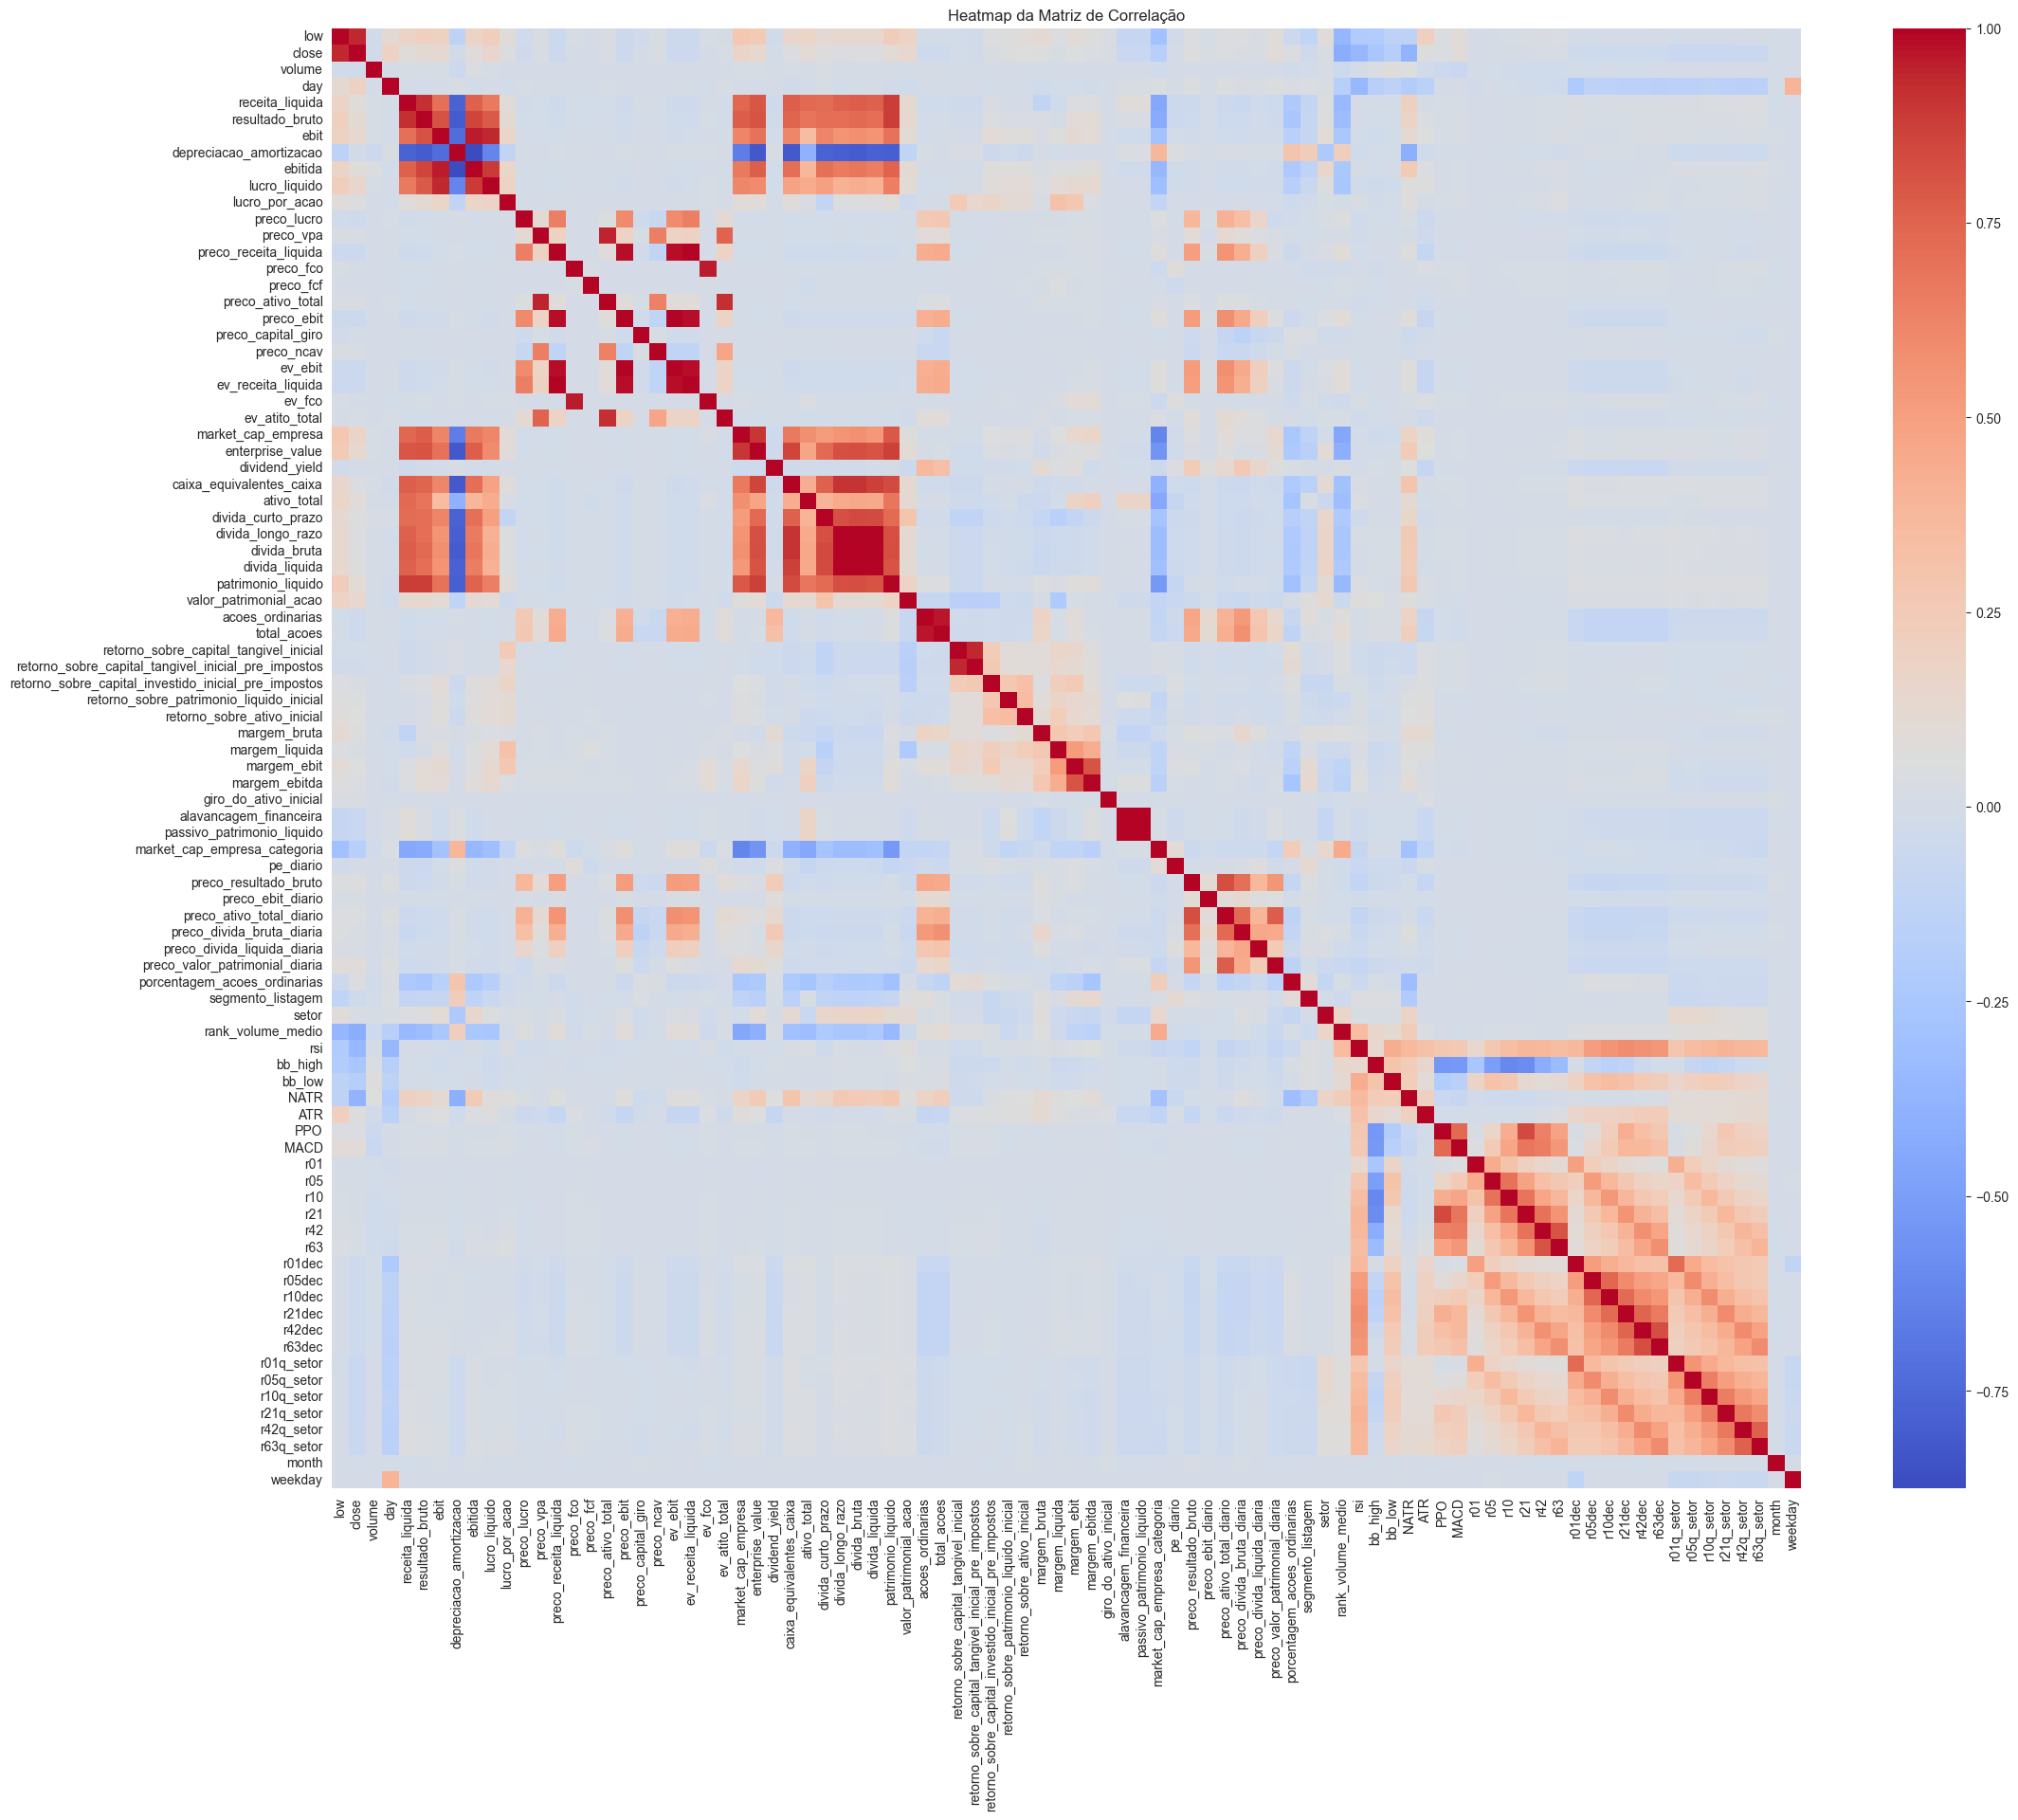

In [52]:
# Calculando a matriz de correlação
correlation_matrix = prices.iloc[:, 2:].corr()

# Criando o heatmap
plt.figure(figsize=(25, 20))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Matriz de Correlação')
#plt.savefig('heatmap.png', dpi=600)
plt.show()

## Random forest

In [311]:
from sklearn.ensemble import RandomForestRegressor

**Separando x e y**

In [427]:
df_y = prices.close

In [428]:
df_x_categorical = prices.drop(['close'],axis=1)

**Padronizando**

In [429]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x_categorical_scaler = scaler.fit_transform(df_x_categorical)

**Criando o algoritimo**

In [430]:
model = RandomForestRegressor()
# Treina o modelo com seus dados
model.fit(df_x_categorical, df_y)

RandomForestRegressor()

**Criando o dataframe de importancias**

In [431]:
feature_importances = model.feature_importances_

# Cria um DataFrame para visualizar as importâncias das características
importance_df = pd.DataFrame({'Feature': df_x_categorical.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [437]:
importance_df.head(20)

,Feature,Importance
0,open,0.739862
1,high,0.140708
65,NATR,0.088607
2,low,0.028748
54,preco_ativo_total_diario,0.000383
66,ATR,0.000173
15,preco_fco,0.000099
55,preco_divida_bruta_diaria,0.000093
31,divida_longo_razo,0.000087
58,porcentagem_acoes_ordinarias,0.000083


**Criando o grafico**

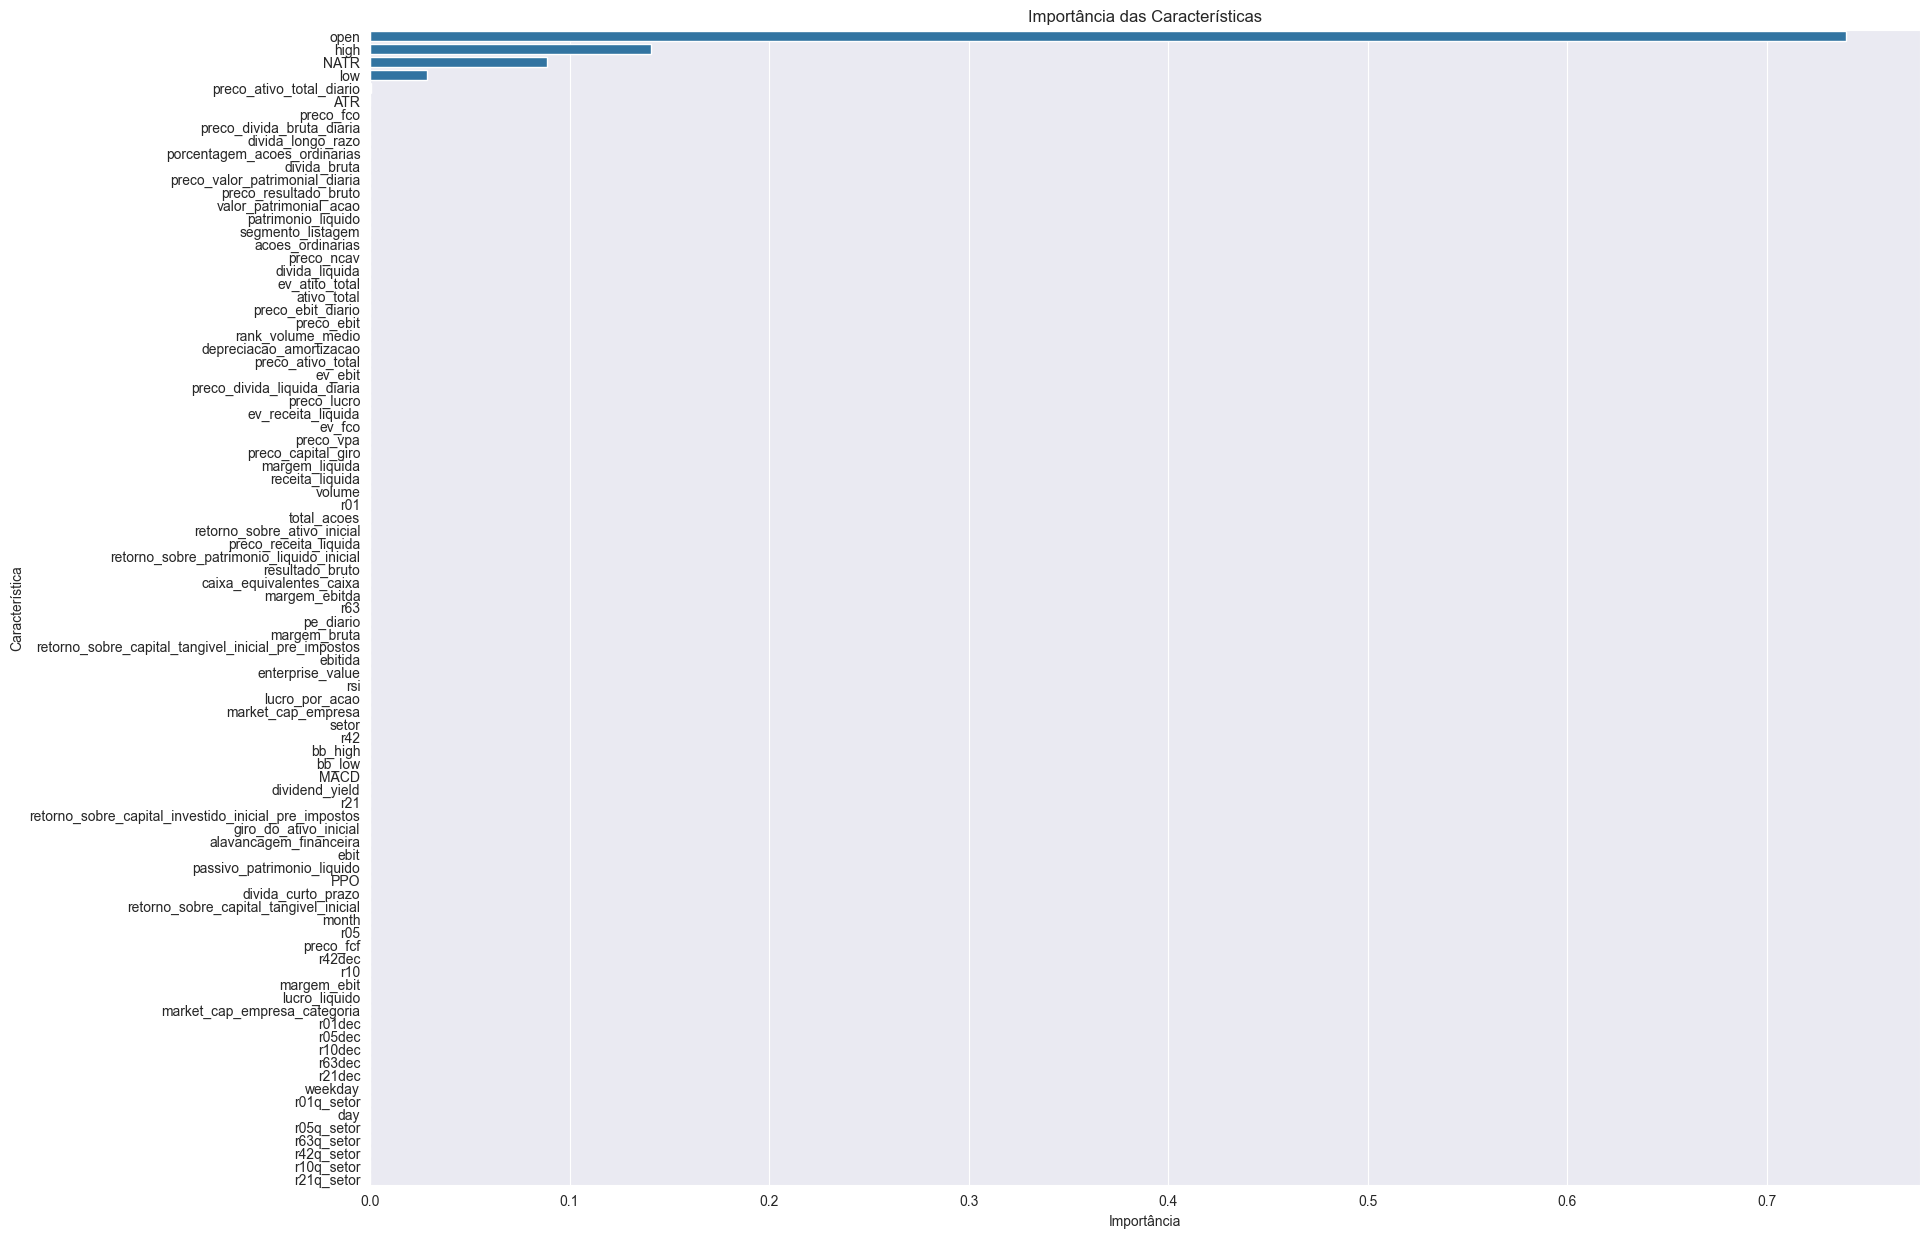

In [433]:
# Plota um gráfico de barras para visualizar as importâncias
plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

## SHAP

In [438]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


**selecionando uma amostra para o shap**

Dados sao muito grandea e demorara muito

In [451]:
nome_tics = prices.index.get_level_values('tic').unique()
lista_reduzida = []
for i in nome_tics:
    lista_reduzida.append(prices[prices.index.get_level_values('tic') == i].sample(n=500, replace=False))
df_amostra = pd.concat(lista_reduzida).sort_index()

In [468]:
print('Data frame de amostra',df_amostra.shape,'Data frame horiginal',df_x_categorical.shape)

Data frame de amostra (25500, 90) Data frame horiginal (439314, 89)


**Selecionando treino e teste**

In [469]:
df_y_shape = df_amostra.close
df_x_shape = df_amostra.drop(['close'],axis=1)

**Treinando o modelo**

In [470]:
# Treina o modelo com seus dados
model.fit(df_x_shape, df_y_shape)

RandomForestRegressor()

In [471]:
# Fits the explainer
explainer = shap.Explainer(model.predict, df_x_shape)

In [472]:
shap_values = explainer(df_x_shape)

PermutationExplainer explainer: 25501it [3:24:45,  2.08it/s]                             


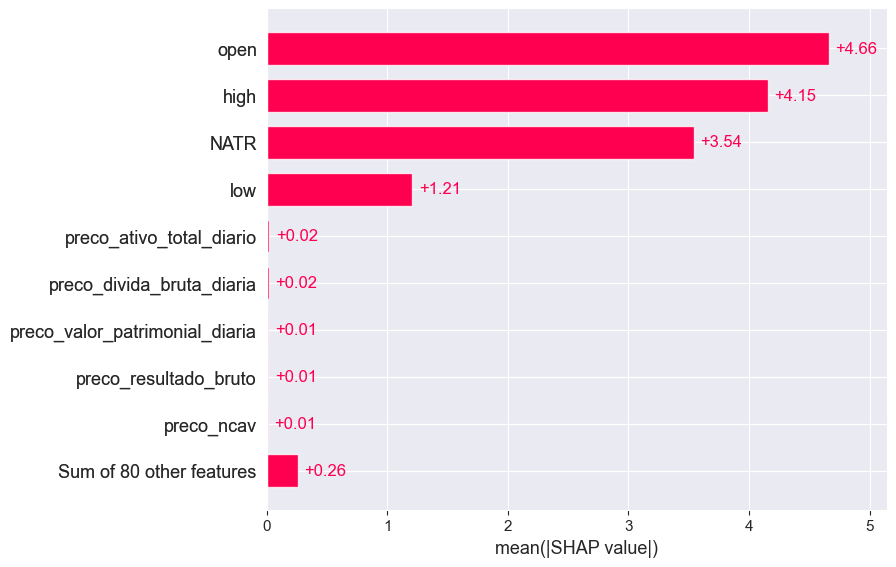

In [473]:
shap.plots.bar(shap_values)

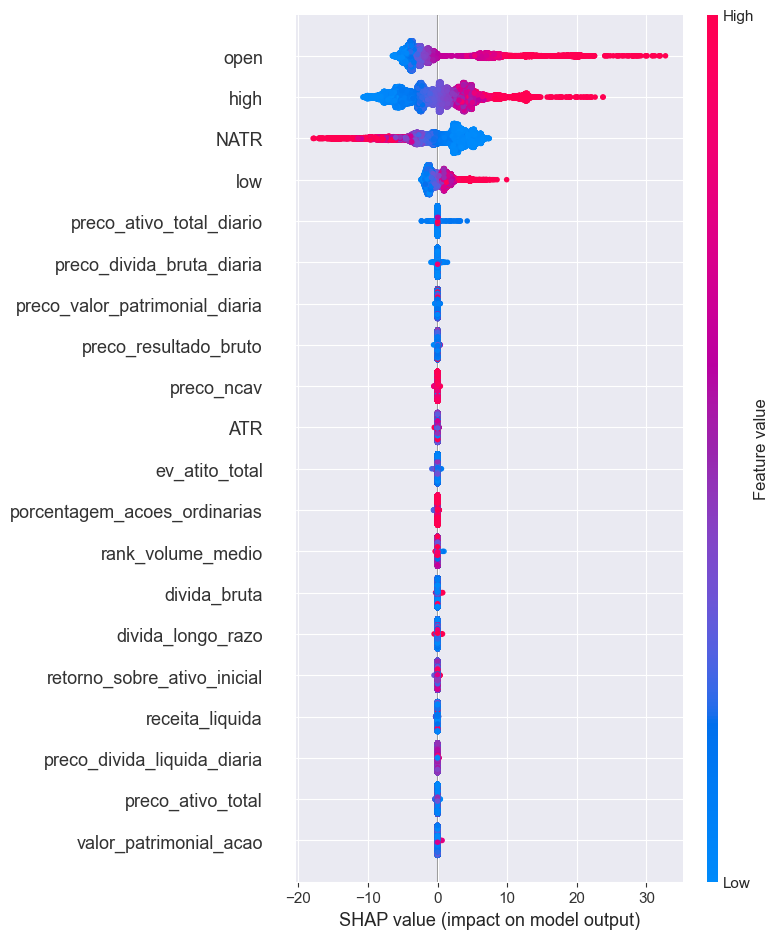

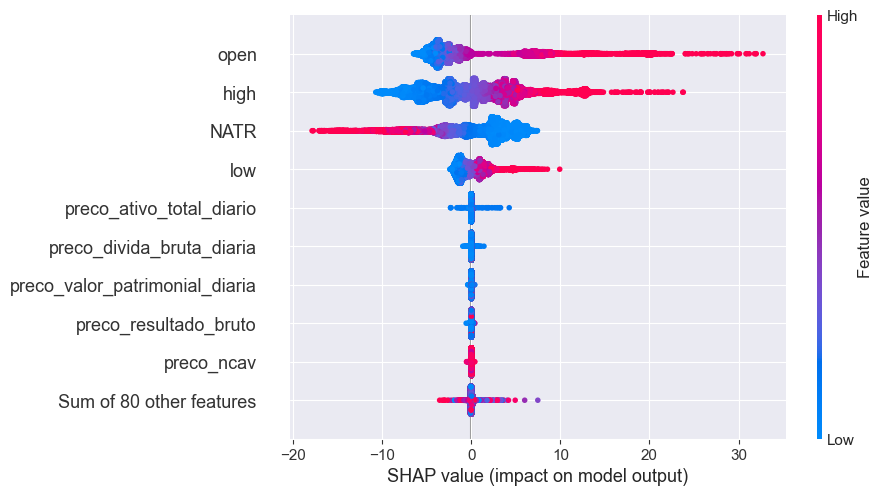

In [474]:
shap.summary_plot(shap_values) 
# ou 
shap.plots.beeswarm(shap_values)

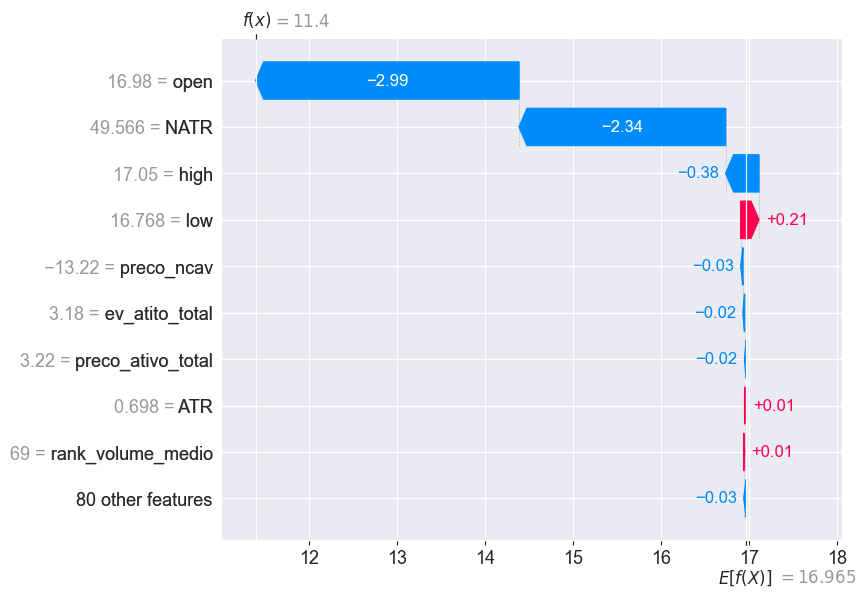

In [475]:
shap.plots.waterfall(shap_values[0])

In [476]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [477]:
print_feature_importances_shap_values(shap_values,df_x_shape)

open -> 4.6619 (softmax = 0.3617)
high -> 4.1532 (softmax = 0.2175)
NATR -> 3.5391 (softmax = 0.1177)
low -> 1.2089 (softmax = 0.0114)
preco_ativo_total_diario -> 0.0235 (softmax = 0.0035)
preco_divida_bruta_diaria -> 0.0170 (softmax = 0.0035)
preco_valor_patrimonial_diaria -> 0.0136 (softmax = 0.0035)
preco_resultado_bruto -> 0.0125 (softmax = 0.0035)
preco_ncav -> 0.0095 (softmax = 0.0035)
ATR -> 0.0091 (softmax = 0.0034)
ev_atito_total -> 0.0090 (softmax = 0.0034)
porcentagem_acoes_ordinarias -> 0.0080 (softmax = 0.0034)
rank_volume_medio -> 0.0079 (softmax = 0.0034)
divida_bruta -> 0.0077 (softmax = 0.0034)
divida_longo_razo -> 0.0075 (softmax = 0.0034)
retorno_sobre_ativo_inicial -> 0.0064 (softmax = 0.0034)
receita_liquida -> 0.0063 (softmax = 0.0034)
preco_divida_liquida_diaria -> 0.0063 (softmax = 0.0034)
preco_ativo_total -> 0.0063 (softmax = 0.0034)
valor_patrimonial_acao -> 0.0062 (softmax = 0.0034)
divida_liquida -> 0.0058 (softmax = 0.0034)
volume -> 0.0057 (softmax = 0.00

# Selecionando os dados

In [1]:
lista_drop = ['alavancagem_financeira',
 'ebit',
 'giro_do_ativo_inicial',
 'passivo_patrimonio_liquido',
 'preco_fcf',
 'r01q_setor',
 'r05q_setor',
 'r10q_setor',
 'r21q_setor',
 'r42q_setor',
 'r63q_setor',
 'retorno_sobre_capital_tangivel_inicial',
 'retorno_sobre_capital_tangivel_inicial_pre_impostos',
 'segmento_listagem',
 'total_acoes',
    'retorno_sobre_capital_tangivel_inicial','r42','r21','ev_ebit','ebit', 'month','r63dec',
              'r05dec','alavancagem_financeira','r01q_setor','r42dec','r21dec','r10dec','r05q_setor','r10q_setor','r21q_setor','r63q_setor','segmento_listagem']
prices.drop(lista_drop,axis=1,inplace=True)

SyntaxError: '[' was never closed (685394629.py, line 1)

In [54]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 439314 entries, ('ABEV3', '2000-02-29') to ('YDUQ3', '2023-09-29')
Data columns (total 75 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   open                                                  439314 non-null  float64
 1   high                                                  439314 non-null  float64
 2   low                                                   439314 non-null  float64
 3   close                                                 439314 non-null  float64
 4   volume                                                439314 non-null  float64
 5   day                                                   439314 non-null  float64
 6   receita_liquida                                       439314 non-null  float64
 7   resultado_bruto                                       439314 non-null  float64
 8   depre

# Salvando os dados de treino e teste

In [55]:
prices

open       high        low      close     volume  day  \
tic   data                                                                     
ABEV3 2000-02-29  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-01  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-02  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-03  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
      2000-03-04  16.980267  17.050261  16.768290  11.399803  1126114.0  2.0   
...                     ...        ...        ...        ...        ...  ...   
YDUQ3 2023-09-25  19.250000  19.389999  18.820000  19.040001  3672200.0  4.0   
      2023-09-26  18.889999  19.510000  18.860001  19.000000  5959900.0  1.0   
      2023-09-27  19.150000  19.639999  18.719999  18.870001  7060400.0  2.0   
      2023-09-28  19.030001  19.600000  18.600000  19.600000  6025700.0  3.0   
      2023-09-29  19.809999  20.260000  19.549999  19.870001  3847600.0  4.0   

                  receita_liquida  resultado_bruto  depreciacao_amortizacao  \
tic   data                                                                    
ABEV3 2000-02-29          11960.0          7180.00                  -9.8285   
      2000-03-01          11960.0          7180.00                  -9.8285   
      2000-03-02          11960.0          7180.00                  -9.8285   
      2000-03-03          11960.0          7180.00                  -9.8285   
      2000-03-04          11960.0          7180.00                  -9.8285   
...                           ...              ...                      ...   
YDUQ3 2023-09-25           1310.0           757.62                  -2.0217   
      2023-09-26           1310.0           757.62                  -2.0217   
      2023-09-27           1310.0           757.62                  -2.0217   
      2023-09-28           1310.0           757.62                  -2.0217   
      2023-09-29           1310.0           757.62                  -2.0217   

                  ebitida  ...       r42       r63  r01dec  r05dec  r10dec  \
tic   data                 ...                                               
ABEV3 2000-02-29  50.2000  ...  0.000000  0.000000     2.0     2.0     2.0   
      2000-03-01  50.2000  ...  0.000000  0.000000     0.0     2.0     2.0   
      2000-03-02  50.2000  ...  0.000000  0.000000     2.0     2.0     2.0   
      2000-03-03  50.2000  ...  0.000000  0.000000     2.0     2.0     2.0   
      2000-03-04  50.2000  ...  0.000000  0.000000     2.0     2.0     2.0   
...                   ...  ...       ...       ...     ...     ...     ...   
YDUQ3 2023-09-25   4.1518  ... -0.061078 -0.090323     1.0     1.0     1.0   
      2023-09-26   4.1518  ... -0.101562 -0.081396     7.0     2.0     3.0   
      2023-09-27   4.1518  ... -0.150935 -0.081541     4.0     4.0     2.0   
      2023-09-28   4.1518  ... -0.108180 -0.034404     9.0     7.0     1.0   
      2023-09-29   4.1518  ... -0.103949 -0.066527     7.0     8.0     4.0   

                  r21dec  r42dec  r63dec  month  weekday  
tic   data                                                
ABEV3 2000-02-29     2.0     2.0     2.0      2        1  
      2000-03-01     2.0     2.0     2.0      3        2  
      2000-03-02     2.0     2.0     2.0      3        3  
      2000-03-03     2.0     2.0     2.0      3        4  
      2000-03-04     2.0     2.0     2.0      3        5  
...                  ...     ...     ...    ...      ...  
YDUQ3 2023-09-25     2.0     4.0     4.0      9        0  
      2023-09-26     4.0     3.0     5.0      9        1  
      2023-09-27     2.0     1.0     5.0      9        2  
      2023-09-28     3.0     2.0     6.0      9        3  
      2023-09-29     2.0     2.0     4.0      9        4  

[439314 rows x 75 columns]

In [15]:
#prices.to_hdf('dados_ibovespa.h5','dados_fun_tec')

In [56]:
prices.to_csv('dados_fun_tec.csv')